# Primer prototipo de machine learning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BASEdeDatos.csv') 
print(df.shape)
df.head()

(8825, 15)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tc_1,Pc_1,w_1,a_1,b_1,Tc_2,Pc_2,w_2,a_2,b_2,kij,type
0,0,0,0.0,389.08,123.51,0.4648,3.622103,0.022693,1188.46,43.44,0.6163,96.086964,0.197082,0.0,4.0
1,1,1,1.0,220.84,362.02,0.1494,0.398115,0.004394,418.69,360.45,0.1333,1.437227,0.008368,0.0,1.0
2,2,2,2.0,800.74,174.26,0.2108,10.873528,0.033101,1121.86,179.86,0.0890,20.678922,0.044932,0.0,1.0
3,3,3,3.0,677.23,218.27,0.1702,6.209598,0.022351,701.46,229.67,0.1092,6.331210,0.022001,0.0,1.0
4,4,4,4.0,227.21,118.44,0.8747,1.288076,0.013819,276.95,160.25,0.3704,1.414457,0.012450,0.0,1.0


## Mejorar el dataFrame

In [3]:
#Que tipo de dato es cada columna
df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
Unnamed: 0.1.1    float64
Tc_1              float64
Pc_1              float64
w_1               float64
a_1               float64
b_1               float64
Tc_2              float64
Pc_2              float64
w_2               float64
a_2               float64
b_2               float64
kij               float64
type              float64
dtype: object

In [4]:
df = df.drop(df.columns[[0, 1, 2]], axis='columns')
df = df.drop(columns=['kij'])
df.describe()

,Tc_1,Pc_1,w_1,a_1,b_1,Tc_2,Pc_2,w_2,a_2,b_2,type
count,8825.000000,8825.000000,8825.000000,8825.000000,8825.000000,8825.000000,8825.000000,8825.000000,8825.000000,8825.000000,8825.000000
mean,475.772481,179.316549,0.454979,11.639032,0.048487,770.683872,180.049822,0.483135,26.969070,0.075527,2.201133
std,260.665496,120.038627,0.278664,25.717509,0.093838,376.812604,165.262238,0.294824,79.544609,0.125546,1.042392
min,1.630000,1.450000,-0.799800,0.000445,0.000196,11.440000,1.920000,-1.114700,0.001626,0.000295,1.000000
25%,274.300000,57.799833,0.227700,1.244639,0.009663,568.000000,57.460000,0.258500,5.410152,0.019279,1.000000
50%,469.120000,170.940000,0.411500,4.290203,0.019923,764.000000,167.180000,0.453600,12.125035,0.033156,2.000000
75%,633.760000,284.280000,0.687800,13.285793,0.053729,987.380000,277.150000,0.710200,30.146077,0.094537,3.000000
max,4287.000000,399.980000,1.158000,788.644486,1.837847,9803.000000,6510.998592,2.388500,3084.940255,2.931567,5.000000


In [5]:
#Datos que hay en la columna type
df['type'].value_counts()

3.0    2908
1.0    2797
2.0    2440
4.0     376
5.0     304
Name: type, dtype: int64

Voy a sacar las filas donde no haya podido encontrar el tipo de comportamiento y convertir '-3' en 3.

In [6]:
df['type'] = df['type'].replace('no hay type', np.nan) #Convertirlos en nulos
df = df.dropna() #Sacar los nulos

df['type'] = pd.to_numeric(df['type']) 
df['type'] = df['type'].abs() #Sacar valor absoluto de la columna

df['type'].value_counts()

3.0    2908
1.0    2797
2.0    2440
4.0     376
5.0     304
Name: type, dtype: int64

También voy a sacar las columnas que no sirven.

## Visualizar datos

In [102]:
#No se si tiene mucho sentido en nuestro caso

#sns.pairplot(df, hue='type', diag_kind='auto')
#plt.show()

In [103]:
#df.to_csv('BaseDeDatos2.csv')

## Preparar los datos para los algoritmos de machine learning

In [7]:
df_h = df
df_h.shape

(8825, 11)

In [8]:
df_h['type'] = df_h['type'].astype('category') #Convertir los tipos de comportamiento en categorias.
df_h['type'].dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=False)

In [9]:
df_h.columns

Index(['Tc_1', 'Pc_1', 'w_1', 'a_1', 'b_1', 'Tc_2', 'Pc_2', 'w_2', 'a_2',
       'b_2', 'type'],
      dtype='object')

In [10]:
y = df_h['type'] #Output
X = df_h[['Tc_1', 'Pc_1', 'w_1', 'Tc_2', 'Pc_2', 'w_2']] #Input


In [11]:
#Normalizar los datos
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)

In [12]:
X = pd.DataFrame(X_norm, columns=X.columns)

X.describe()

,Tc_1,Pc_1,w_1,Tc_2,Pc_2,w_2
count,8825.000000,8825.000000,8825.000000,8825.000000,8825.000000,8825.000000
mean,0.110642,0.446307,0.640913,0.077541,0.027366,0.456107
std,0.060827,0.301203,0.142335,0.038483,0.025389,0.084158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.063628,0.141394,0.524824,0.056841,0.008533,0.391984
50%,0.109090,0.425288,0.618705,0.076858,0.025389,0.447676
75%,0.147509,0.709683,0.759832,0.099672,0.042284,0.520924
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Dividir que datos van a ser para entrenar y que datos para testear
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [14]:
X_test.head()

,Tc_1,Pc_1,w_1,Tc_2,Pc_2,w_2
5361,0.083479,0.820967,0.627388,0.038875,0.044490,0.485556
4045,0.044699,0.410283,0.488456,0.084766,0.039880,0.410796
1511,0.100929,0.951070,0.497446,0.078031,0.035169,0.496489
5023,0.076185,0.280230,0.561395,0.057853,0.023129,0.508592
8629,0.152465,0.094473,0.643580,0.085130,0.004047,0.495947


In [15]:
y_train.head()

4139    2.0
2116    2.0
7736    3.0
4023    3.0
6798    3.0
Name: type, dtype: category
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

## Distintos modelos

### Arbol de decisiones 

In [16]:
#Este algoritmo no tiene mucho sentido para nosotros
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
#from sklearn import tree
#tree.plot_tree(model_dt)

In [17]:
from sklearn.metrics import accuracy_score
#Se puede testear con los mismos datos con los que entrenó.
predictions_dt = model_dt.predict(X_train)
print("DecisionTreeClassifier", accuracy_score(y_train, predictions_dt))
#Es interesante ver como este modelo practicamente "memorizo los datos"

DecisionTreeClassifier 1.0


In [18]:
#Ahora con los datos de testeo, esto va a dar la verdadera exactitud del modelo
predictions_dt = model_dt.predict(X_test)
print("DecisionTreeClassifier", accuracy_score(y_test, predictions_dt))

DecisionTreeClassifier 0.7126132930513596


Text(0.5, 1.0, 'confusion_matrix')

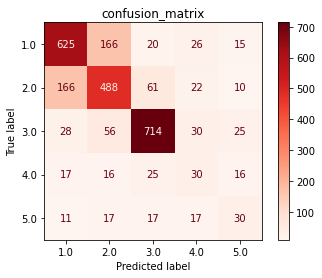

In [19]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model_dt, X_test, y_test,
                                 cmap=plt.cm.Reds)
disp.ax_.set_title('confusion_matrix')

### Regresión logística

In [20]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

C:\Users\Nicolas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
predictions_lr = model_lr.predict(X_train)
print("LogisticRegression", accuracy_score(y_train, predictions_lr))

LogisticRegression 0.6480492148292051


In [22]:
predictions_lr = model_lr.predict(X_test)
print("LogisticRegression", accuracy_score(y_test, predictions_lr))

LogisticRegression 0.6359516616314199


Text(0.5, 1.0, 'confusion_matrix')

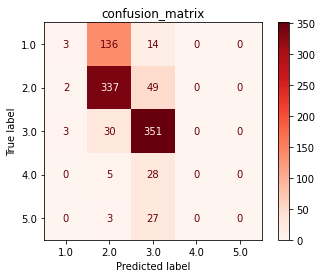

In [121]:
disp = plot_confusion_matrix(model_lr, X_test, y_test,
                                 cmap=plt.cm.Reds)
disp.ax_.set_title('confusion_matrix')

### Support Vector Machines 

In [23]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(X_train, y_train)

SVC()

In [24]:
predictions_SVC = model_SVC.predict(X_train)
print("SupportVectorMachines", accuracy_score(y_train, predictions_SVC))

SupportVectorMachines 0.7301278937995791


In [25]:
predictions_SVC = model_SVC.predict(X_test)
print("SupportVectorMachines", accuracy_score(y_test, predictions_SVC))

SupportVectorMachines 0.7235649546827795


Text(0.5, 1.0, 'confusion_matrix')

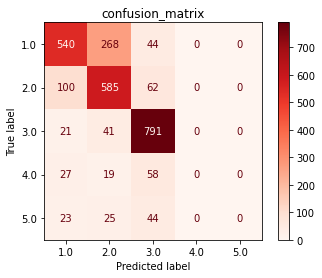

In [26]:
disp = plot_confusion_matrix(model_SVC, X_test, y_test,
                                 cmap=plt.cm.Reds)
disp.ax_.set_title('confusion_matrix')

### KNN

"k nearest neighbor" necesita que se le indique la cantidad de vecinos (K) que debe tener en cuenta para hacer la clasificación. Entonces tenemos que buscar cual es la cantidad que nos de la mejor exactitud. 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(1, 10): #Voy a probar con vecinos del 1 al 9.
    model_KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    predictions_KNN = model_KNN.predict(X_test)
    exactitud = accuracy_score(y_test, predictions_KNN)
    print(n, ':', exactitud)

1 : 0.6166918429003021
2 : 0.6072507552870091
3 : 0.6268882175226587
4 : 0.6302870090634441
5 : 0.6370845921450151
6 : 0.6412386706948641
7 : 0.6487915407854985
8 : 0.6469033232628398
9 : 0.6469033232628398


In [28]:
#Con 3 es donde mejor exactitud hay.
model_KNN = KNeighborsClassifier(n_neighbors = 7)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
predictions_KNN = model_KNN.predict(X_train)
print("k-NearestNeighbor", accuracy_score(y_train, predictions_KNN))

k-NearestNeighbor 0.7497166909502995


In [35]:
predictions_KNN = model_KNN.predict(X_test)
print("k-NearestNeighbor", accuracy_score(y_test, predictions_KNN))

k-NearestNeighbor 0.6809876543209876


Text(0.5, 1.0, 'confusion_matrix')

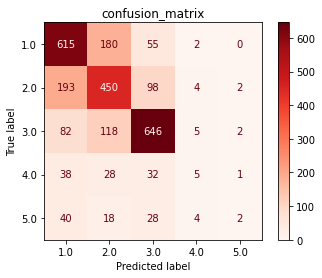

In [30]:
disp = plot_confusion_matrix(model_KNN, X_test, y_test,
                                 cmap=plt.cm.Reds)
disp.ax_.set_title('confusion_matrix')

### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=50, class_weight={4: 5, 5: 5})
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={4: 5, 5: 5}, n_estimators=50)

In [34]:
predictions_rf = model_rf.predict(X_test)
print("RandomForestClassifier", accuracy_score(y_test, predictions_rf))

RandomForestClassifier 0.7953172205438066


Text(0.5, 1.0, 'confusion_matrix')

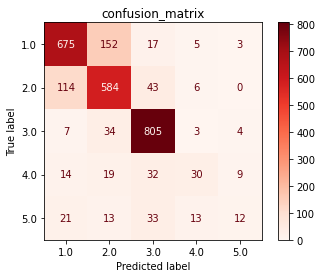

In [35]:
disp = plot_confusion_matrix(model_rf, X_test, y_test,
                                 cmap=plt.cm.Reds)
disp.ax_.set_title('confusion_matrix')